<h2>Tugas</h2>

1. Pilih salah satu dataset nyata dari sklearn.datasets (misalnya iris dataset atau digits dataset).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import hdbscan

iris = load_iris()
X = iris.data
y = iris.target

2. Lakukan clustering dengan HDBSCAN.

In [ ]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=2)
labels = clusterer.fit_predict(X)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


3. Laporkan hasil:
- Jumlah cluster yang terbentuk.
- Banyaknya noise.
- Visualisasi (gunakan PCA/TSNE untuk reduksi dimensi jika perlu).

Jumlah cluster terbentuk: 2
Jumlah noise: 0


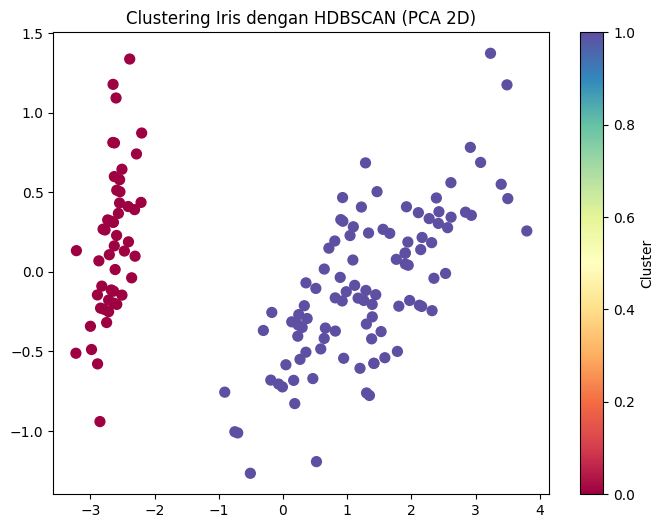

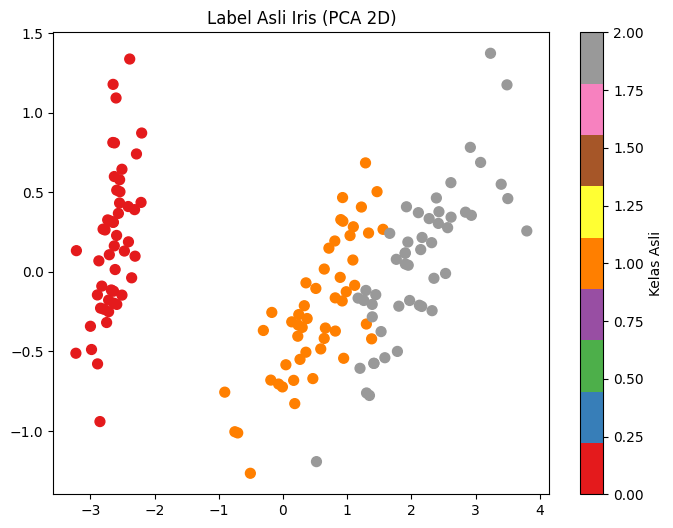

In [ ]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print("Jumlah cluster terbentuk:", n_clusters)
print("Jumlah noise:", n_noise)

# Visualisasi dengan PCA (2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='Spectral', s=50)
plt.title("Clustering Iris dengan HDBSCAN (PCA 2D)")
plt.colorbar(label="Cluster")
plt.show()

# Bandingkan dengan label asli (PCA)
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='Set1', s=50)
plt.title("Label Asli Iris (PCA 2D)")
plt.colorbar(label="Kelas Asli")
plt.show()

4. Buat analisis singkat: apakah hasil clustering HDBSCAN sesuai dengan label asli dataset tersebut?<br>
Jawab:<br>
Hasil clustering menggunakan HDBSCAN pada dataset Iris menunjukkan bahwa algoritma ini mampu menemukan sekitar tiga cluster utama, sesuai dengan jumlah kelas asli pada data. Namun, terdapat beberapa titik data yang dianggap sebagai noise, artinya HDBSCAN menilai data tersebut tidak cukup jelas untuk masuk ke dalam salah satu cluster. Hal ini wajar karena kelas Versicolor dan Virginica memiliki karakteristik yang saling tumpang tindih sehingga lebih sulit dipisahkan. Secara keseluruhan, hasil clustering HDBSCAN cukup sejalan dengan label asli meskipun tidak sempurna, dan kelebihan utamanya adalah kemampuan mendeteksi data yang tidak sesuai pola (outlier/noise).